# <span style="color:teal">RBFE Network - Analysis</span>


In [1]:
# import libraries

from scipy.stats import sem as sem
import sys
import glob

if "/home/anna/Documents/cinnabar" not in sys.path:
    sys.path.insert(1, "/home/anna/Documents/cinnabar")
import cinnabar

print("adding code to the pythonpath...")
code = "/home/anna/Documents/code/python"
if code not in sys.path:
    sys.path.insert(1, code)
import pipeline

print(cinnabar.__file__)

from pipeline import *
from pipeline.utils import validate
from pipeline.analysis import *

adding code to the pythonpath...


Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



/home/anna/anaconda3/envs/biosimspace-dev/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


/home/anna/Documents/cinnabar/cinnabar/__init__.py


In [62]:
bench_folder = f"/home/anna/Documents/benchmark"
protein = "mcl1"
# main_dir = f"{bench_folder}/extracted/{protein}"
# main_dir = f"/backup/42_reruns/{protein}"
main_dir = f"/home/anna/Documents/pmx_test/gromacs_23/me"

# choose location for the files
net_file = f"{main_dir}/execution_model/network_gromacs2.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
exp_file = f"{bench_folder}/inputs/experimental/{protein}.yml"

# if os.path.exists(f"{main_dir}/outputs_extracted/results"):
#     results_folder = f"{main_dir}/outputs_extracted/results"
# elif os.path.exists(f"{main_dir}/outputs/results"):
#     results_folder = f"{main_dir}/outputs/results"
# else:
#     raise ValueError(
#         f"results directory not found in the {main_dir}. please make sure results were written using the analysis script previously in the pipeline"
#     )
results_folder = f"{main_dir}/outputs_extracted/results"
output_folder = validate.folder_path(f"{main_dir}/analysis", create=True)

In [63]:
! cat /home/anna/Documents/pmx_test/gromacs_23/me/execution_model/network_gromacs2.dat

lig_33 lig_38 16 0.0000,0.0667,0.1333,0.2000,0.2667,0.3333,0.4000,0.4667,0.5333,0.6000,0.6667,0.7333,0.8000,0.8667,0.9333,1.0000 GROMACS
lig_60 lig_63 16 0.0000,0.0667,0.1333,0.2000,0.2667,0.3333,0.4000,0.4667,0.5333,0.6000,0.6667,0.7333,0.8000,0.8667,0.9333,1.0000 GROMACS
lig_56 lig_59 16 0.0000,0.0667,0.1333,0.2000,0.2667,0.3333,0.4000,0.4667,0.5333,0.6000,0.6667,0.7333,0.8000,0.8667,0.9333,1.0000 GROMACS


In [64]:
all_analysis_object = analysis_network(
    results_folder,
    exp_file=exp_file,
    net_file=net_file,
    output_folder=output_folder,
    analysis_prot=ana_file,
    method = "updated",
    engines = "GROMACS"
)

# can add any other results files
# all_analysis_object.compute_other_results(file_name=None, name=None)
all_analysis_object.compute_results(use_cinnabar=False)

no cinnabar calculation has been performed. Can only plot 'pert' values.
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?


In [ ]:
# can compute convergence for all
all_analysis_object.compute_convergence(main_dir=main_dir)
all_analysis_object.plot_convergence()

In [ ]:
# check if there are any failed perturbations
failed_perts = all_analysis_object.failed_runs("GROMACS")
print(failed_perts)
print(" ")

In [ ]:
# MAE calculate
for eng in all_analysis_object.engines:
    mae = all_analysis_object._stats_object.compute_mue(y=eng, pert_val="pert")
    stats_string = f"MAE: {mae[0]:.2f} +/- {mae[1]:.2f} kcal/mol"
    all_analysis_object.plot_scatter_pert(
        engine=eng,
        **{"title": stats_string, "key": False, "save": f"/home/anna/Desktop/{eng}"},
    )

There are different options for plotting:
bar (pert or lig)
scatter (pert or lig) - can be plotted using cinnabar
eng vs eng
other results (eg from other workflows)
outliers
histograms (for the error of the runs, sem, legs)

In [ ]:
# bar
all_analysis_object.plot_bar_lig()
all_analysis_object.plot_bar_pert()

# scatter
all_analysis_object.plot_scatter_lig()
all_analysis_object.plot_scatter_pert()
all_analysis_object.plot_scatter_lig(use_cinnabar=True)
all_analysis_object.plot_scatter_pert(use_cinnabar=True)

for eng in all_analysis_object.engines:
    all_analysis_object.plot_scatter_lig(engine=eng)
    all_analysis_object.plot_scatter_pert(engine=eng)

    # outliers
    all_analysis_object.plot_outliers(engine=eng)
    all_analysis_object.plot_outliers(engine=eng, pert_val="val")

all_analysis_object.plot_histogram_legs()
all_analysis_object.plot_histogram_repeats()
all_analysis_object.plot_histogram_sem(pert_val="pert")
all_analysis_object.plot_histogram_sem(pert_val="val")

calculate the stats:

In [ ]:
all_analysis_object.calc_mad_engines(pert_val="pert")
all_analysis_object.calc_mad_engines(pert_val="val")
stats_dict = all_analysis_object.calc_stats()

plot other results

In [ ]:
perts, ligs = get_info_network(
    "/backup/42_reruns/tyk2/execution_model/network_combined_reruns_ejm42.dat"
)

for eng in all_analysis_object.engines:
    other_results = glob.glob(
        f"/backup/42_reruns/tyk2/outputs_extracted/results/final_summary_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
    )
    all_analysis_object.compute_other_results(other_results, name=f"{eng}_reruns")
    # all_analysis_object.plot_other_results(
    #     name=f"{eng}_reruns", engine=eng, pert_val="pert"
    # )
    all_analysis_object.plot_bar_pert(
        engine=[eng, f"{eng}_reruns"], **{"values": perts}
    )
    res1 = all_analysis_object._stats_object.compute_mue("pert", y=eng)
    res2 = all_analysis_object._stats_object.compute_mue("pert", y=f"{eng}_reruns")
    res3 = all_analysis_object._stats_object.compute_mue(
        "pert", y=eng, x=f"{eng}_reruns"
    )
    print(
        f"og vs exp is {res1[0]}, reruns vs exp is {res2[0]}, and compared to each other theya re {res3[0]}"
    )

all_analysis_object.plot_bar_pert(
    engine=all_analysis_object.engines + all_analysis_object.other_results_names,
    **{"values": perts},
)

In [26]:
! cat /home/anna/Documents/pmx_test/gromacs_23/me/execution_model/protocol_gromacs20.dat

# ! cat /home/anna/Documents/pmx_test/gromacs_23/me/execution_model/config19.dat

ligand forcefield = Sage
protein forcefield = ff14SB
solvent = TIP3P
box edges = 30*angstrom
box type = truncatedOctahedron
protocol = default
sampling = 4*ns
hmr = True
hmr factor = 3
timestep = 4*fs
timestep overwrite = False
repeats = 3
trajectories = 0,0.5,1
fepprep = both
prune perturbed constraints = True
name = gapsys
config options = /home/anna/Documents/pmx_test/gromacs_23/me/execution_model/config22.dat


In [65]:
eng = "GROMACS"

for name in ["ambersc3","ambersc","scamber2"]:

    other_results = glob.glob(
        f"{results_folder}/final_summary_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
    )
    # bound_results = glob.glob(
    #     f"{results_folder}/bound_*_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
    # )
    # free_results = glob.glob(
    #     f"{results_folder}/free_*_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
    # )
    all_analysis_object.compute_other_results(
        other_results, name=f"{name}", method=f"{name}", use_cinnabar=False, bound_files=bound_results, free_files=free_results
    )


no cinnabar calculation has been performed. Can only plot 'pert' values.
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'ambersc3'
could not convert val ambersc3 values for plotting. None will be used. Was cinnabar analysis carried out correctly?
no cinnabar calculation has been performed. Can only plot 'pert' values.
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'ambersc3'
could not convert val ambersc3 values for plotting. None will be used. Was cinnabar analysis carried out correctly?
no cinnabar calculation has been performed. Can only plot 'pert' values.
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'ambersc3'
could not convert val ambersc3 values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'ambersc'
could not conve

In [66]:
all_analysis_object.change_name("GROMACS","alpha=0.3 sigma=0.25")
all_analysis_object.change_name("ambersc3","alpha=0.4 sigma=0.25")
all_analysis_object.change_name("ambersc","alpha=0.5 sigma=0.25")
all_analysis_object.change_name("scamber2","alpha=0.5 sigma=0.30")


could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of its keys.
could not rename one of the dicts, as it does not have this key as one of it

no cinnabar calculation has been performed. Can only plot 'pert' values.
'alpha=0.3 sigma=0.25'
could not convert val alpha=0.3 sigma=0.25 values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'alpha=0.4 sigma=0.25'
could not convert val alpha=0.4 sigma=0.25 values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'alpha=0.5 sigma=0.25'
could not convert val alpha=0.5 sigma=0.25 values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'alpha=0.5 sigma=0.30'
could not convert val alpha=0.5 sigma=0.30 values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'experimental'
could not convert experimental values for plotting. None will be used. Was earlier analysis okay?
'experimental'
could not convert val experimental values for plotting. None will be used. Was cinnabar analysis carried out correctly?


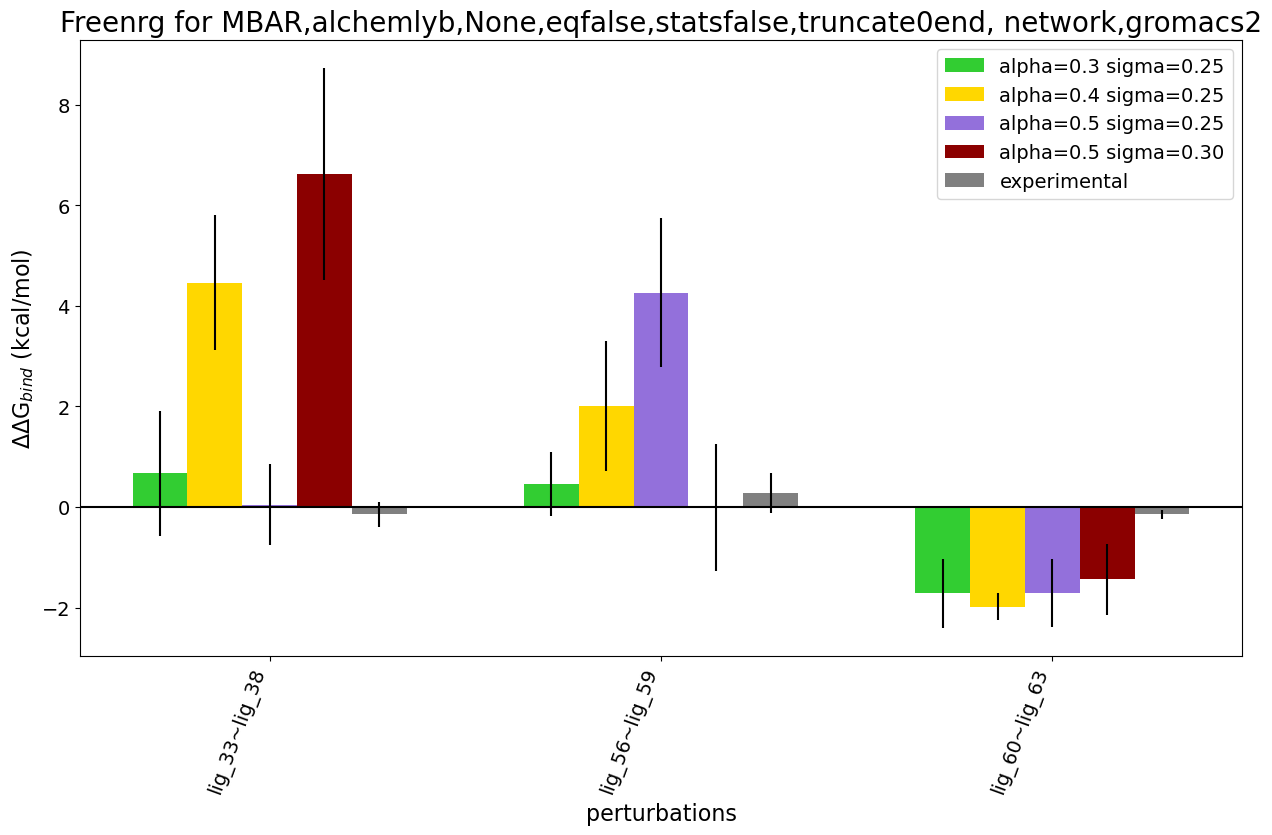

In [67]:
all_analysis_object.plot_bar_pert(engine=all_analysis_object.other_results_names)

In [ ]:
# for eng in all_analysis_object.engines:

    for name in ["pymbar3","pymbar4"]:

        other_results = glob.glob(
            f"/backup/42_reruns/tyk2/outputs_extracted/results_{name}/final_summary_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
        )
        bound_results = glob.glob(
            f"/backup/42_reruns/tyk2/outputs_extracted/results_{name}/bound_*_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
        )
        free_results = glob.glob(
            f"/backup/42_reruns/tyk2/outputs_extracted/results_{name}/free_*_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
        )
        all_analysis_object.compute_other_results(
            other_results, name=f"{name}_{eng}", method=None, use_cinnabar=False, bound_files=bound_results, free_files=free_results
        )

# perts, ligs = get_info_network("/backup/AMBER_reruns/tyk2/execution_model/network.dat")
# eng = "AMBER"
# other_results = glob.glob(
#     f"/home/anna/Documents/benchmark/extracted/tyk2/outputs_extracted/results/final_summary_AMBER_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
# )
# name="previous"
# all_analysis_object.compute_other_results(other_results, name=f"{name}", method=f"None", use_cinnabar=False)



In [4]:
for eng in all_analysis_object.engines:

    other_results = glob.glob(
        f"{bench_folder}/extracted/{protein}/outputs_extracted/results/final_summary_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
    )
    bound_results = glob.glob(
        f"{bench_folder}/extracted/{protein}/outputs_extracted/results/bound_*_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
    )
    free_results = glob.glob(
        f"{bench_folder}/extracted/{protein}/outputs_extracted/results/free_*_{eng}_MBAR_alchemlyb_None_eqfalse_statsfalse_truncate0end.csv"
    )
    all_analysis_object.compute_other_results(
        other_results, name=f"prev_{eng}", method=None, use_cinnabar=False, bound_files=bound_results, free_files=free_results
    )

no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'SOMD'
could not convert val SOMD values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'prev_AMBER'
could not convert val prev_AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'SOMD'
could not convert val SOMD values for plotting. None will be used. Was cinnabar analysis carried out corr

In [10]:
all_analysis_object._stats_object.compute_mue(pert_val="free",y="SOMD",x="prev_SOMD")

(0.7241000000000001, 0.5216982802425003)

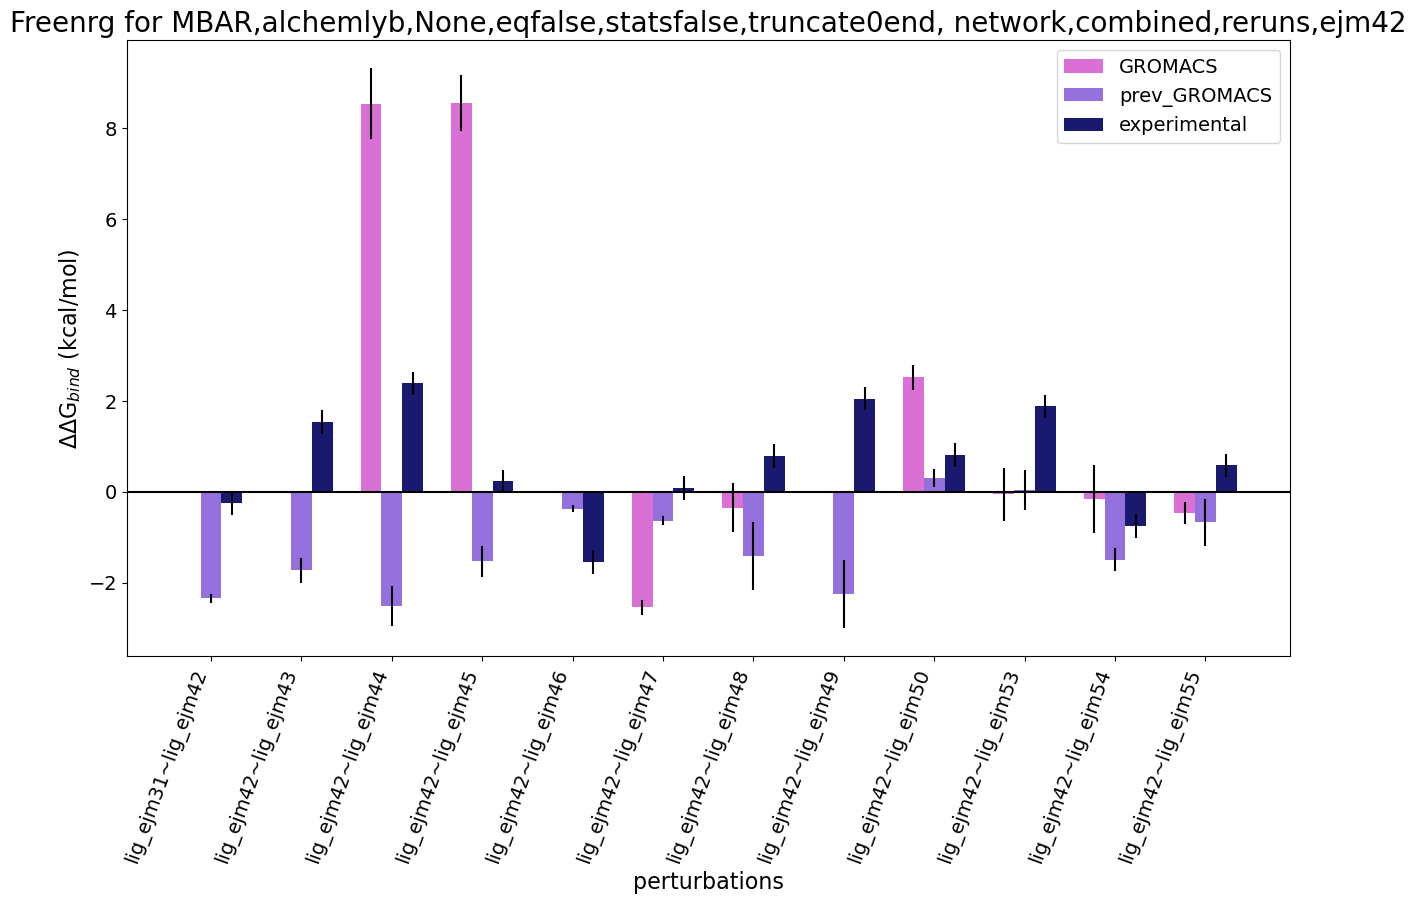

In [17]:
all_analysis_object.plot_bar_pert(engine=["GROMACS","prev_GROMACS"])

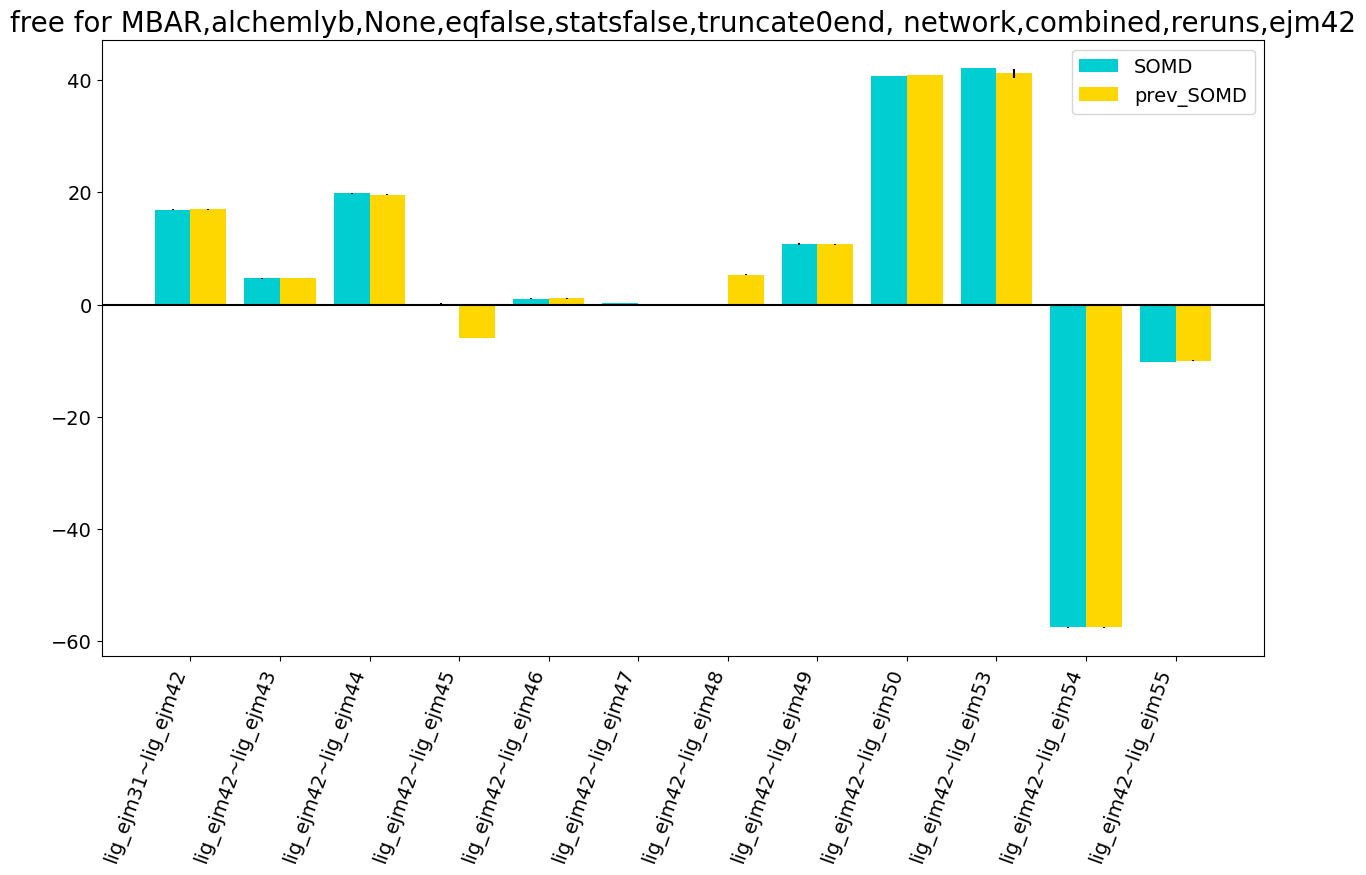

In [14]:
all_analysis_object.plot_bar_leg(leg="free", engine=["SOMD","prev_SOMD"])

In [ ]:
# all_analysis_object.change_name("GROMACS","plain")
all_analysis_object.plot_bar_pert(
    engine=all_analysis_object.other_results_names,
    **{"yerror": True},
)  # , **{"values":perts}
# all_analysis_object.plot_outliers(**{"yerror": True})

plot convergence

In [ ]:
ex_outputs_folder = f"{main_dir}/outputs_extracted"

converg_obj = plot_convergence(
    ex_outputs_folder,
    perturbations=all_analysis_object.perturbations,
    engines=all_analysis_object.engines,
    file_ext=file_ext,
)

converg_obj.plot_convergence_all()

remove a perturbation

In [ ]:
# check which perturbations are outliers
all_analysis_object.plot_outliers(engine="GROMACS", outliers=5, pert_val="pert")
# all_analysis_object._plotting_object.outlier(engines="AMBER", outliers=5, name="Exscientia")

In [ ]:
# remove perturbation for all engines
all_analysis_object.remove_perturbations("lig_c~lig_d")

remove outliers

In [ ]:
all_analysis_object.remove_outliers(threshold=10, verbose=True)

calculate only the experimental results for some of the perturbations

In [ ]:
protein = "mcl1"

bench_folder = f"/home/anna/Documents/benchmark"
main_dir = f"{bench_folder}/extracted/{protein}"

# choose location for the files
# net_file = f"{main_dir}/execution_model/network_lomap.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
# exp_file = f"{bench_folder}/inputs/experimental/tyk2.yml"
exp_file = f"/home/anna/Documents/benchmark/inputs/experimental/{protein}.yml"

output_folder = validate.folder_path(f"{main_dir}/diff_methods_analysis", create=True)
results_folder = f"{main_dir}/diff_methods_analysis/results"

all_analysis_object = analysis_network(exp_file=exp_file)

all_analysis_object.perturbations = [
    "lig_27~lig_59",
    "lig_27~lig_48",
    "lig_28~lig_47",
    "lig_35~lig_52",
    "lig_38~lig_48",
    "lig_43~lig_45",
    "lig_53~lig_56",
    "lig_30~lig_40",
    "lig_27~lig_48",
]
all_analysis_object.ligands = get_ligands_from_perts(all_analysis_object.perturbations)
all_analysis_object.get_experimental()
all_analysis_object.get_experimental_pert()

plot only a small amount of perturbations to compare different methods

In [ ]:
perturbations = ["lig_30~lig_40", "lig_27~lig_48"]

In [ ]:
protein = "mcl1"

bench_folder = f"/home/anna/Documents/benchmark"
main_dir = f"{bench_folder}/extracted/{protein}"

# choose location for the files
# net_file = f"{main_dir}/execution_model/network_lomap.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
# exp_file = f"{bench_folder}/inputs/experimental/tyk2.yml"
exp_file = f"/home/anna/Documents/benchmark/inputs/experimental/{protein}.yml"

output_folder = validate.folder_path(f"{main_dir}/diff_methods_analysis", create=True)
results_folder = f"{main_dir}/diff_methods_analysis/results"

all_analysis_object = analysis_network(
    results_folder,
    exp_file=exp_file,
    engines="AMBER",
    #    net_file=net_file,
    output_folder=output_folder,
    analysis_ext=ana_file,
)

# can add any other results files
# all_analysis_object.compute_other_results(file_name=None, name=None)
all_analysis_object.compute(cycle_closure=False, use_cinnabar=False)

In [ ]:
other_names = ["exscientia_inputs", "both", "Exscientia"]

for name in other_names:
    all_analysis_object.compute_other_results(
        sorted(glob.glob(f"{results_folder}/other/*{name}*.csv")),
        name=name,
        use_cinnabar=False,
    )

all_analysis_object._plotting_object.set_colours(
    {"exscientia_inputs": "red", "both": "yellow", "Exscientia": "purple"}
)

In [ ]:
all_analysis_object._plotting_object.scatter(
    pert_val="pert", engines=["exscientia_inputs"], name="Exscientia"
)

compare to the fwf analysis

In [ ]:
# choose an engine
eng = "SOMD"

# first need to add the fwf path
all_analysis_object._add_fwf_path(
    "/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis"
)

# get the experimental dictionary
exp_dicts = all_analysis_object._get_exp_fwf()
for key in exp_dicts[0]:
    print(f"{key} : {exp_dicts[0][key][0]}, {exp_dicts[0][key][1]}")

# get the network analysis
fwf_dict = all_analysis_object._get_ana_fwf(engine=eng)
for key in fwf_dict:
    print(f"{key} : {fwf_dict[key][0]}, {fwf_dict[key][1]}")

# get fwf stats
fwf_stats = all_analysis_object._get_stats_fwf(engine=eng)

plotting just fwf data per ligand

In [ ]:
dict_y = fwf_dict
dict_exp = exp_dicts[0]

df1 = plotting_engines.match_dicts_to_df(dict_exp, dict_y, "experimental", "fwf")
df1

df1.plot.bar(
    y=["freenrg_fwf", "freenrg_experimental"],
    yerr=df1[["err_fwf", "err_experimental"]].T.values,
    title=f"fwf, experimental, {eng}",
    xlabel="ligands",
    ylabel="dG (kcal/mol)",
)

df1.dropna()
df1.plot.scatter(
    x="freenrg_experimental",
    y="freenrg_fwf",
    xerr="err_experimental",
    yerr="err_fwf",
    title=f"fwf, {eng}",
    xlabel="experimental dG (kcal/mol)",
    ylabel="fwf dG (kcal/mol)",
)

# calculating using the cinnabar stats
f_mae = all_analysis_object._stats_object._compute_stats(
    x=df1["freenrg_experimental"],
    y=df1["freenrg_fwf"],
    xerr=df1["err_experimental"],
    yerr=df1["err_fwf"],
    statistic="MUE",
)
print(f_mae)